In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.insert(0,'..')

from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import json as json
import re
from sklearn.metrics import roc_curve

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_error_detection_seq

def plot_roc_auc(res_path):
    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.load(f)
        
    probs = np.asarray(model_outputs['probabilities'])
    probs_toks = probs.reshape(-1, probs.shape[-1])
    
    sampled_probs = np.asarray(model_outputs['sampled_probabilities'])
    sampled_probs_toks = sampled_probs.reshape(sampled_probs.shape[0], sampled_probs.shape[1]*sampled_probs.shape[2], -1)
    
    labels = np.asarray(model_outputs['true_labels'])
    labels_toks = labels.reshape(-1)
    
    use_idx = (labels_toks!=-100)

    plot_error_detection(probs_toks[use_idx], 
                         labels_toks[use_idx], 
                         sampled_probs_toks[:, use_idx].transpose(1, 0, 2))
    return probs, labels, sampled_probs

def plot_roc_auc_seq(probs, labels, sampled_probs):
    plot_error_detection_seq(labels, probs, sampled_probs)

In [7]:
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs

def plot_rejection_curves(res_path):
    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.load(f)
        
    probs = np.asarray(model_outputs['probabilities'])
    probs_toks = probs.reshape(-1, probs.shape[-1])
    
    sampled_probs = np.asarray(model_outputs['sampled_probabilities'])
    sampled_probs_toks = sampled_probs.reshape(sampled_probs.shape[0], sampled_probs.shape[1]*sampled_probs.shape[2], -1)
    
    labels = np.asarray(model_outputs['true_labels'])
    labels_toks = labels.reshape(-1)
    
    use_idx = (labels_toks!=-100)

    plot_rejection_curve_aucs(probs_toks[use_idx], 
                              labels_toks[use_idx], 
                              sampled_probs_toks[:, use_idx].transpose(1, 0, 2),
                              np.asarray(model_outputs['answers']).reshape(-1)[use_idx])

## CoNLL-2003

## MC Last

### token level metrics

bald: 0.9371789428995967
var_ratio: 0.9463489704945871
entropy: 0.9336110521474563
sampled_max_prob: 0.9399649755890469
variance: 0.9388045708625203
max_prob: 0.9401754758366943


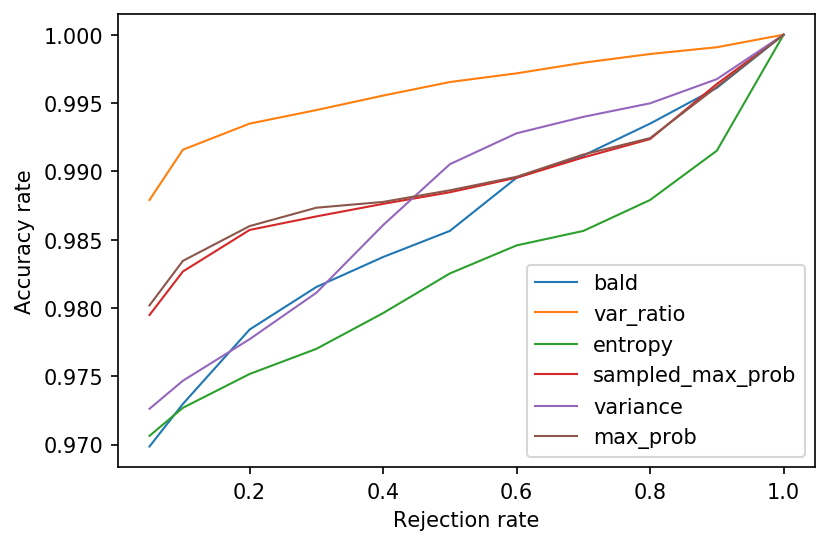

In [7]:
res_dir = '../workdir/results/dpp_masks_calibrate/conll2003/ht_dpp/rbf/True/20/0.3/101/101/'
plot_rejection_curves(res_dir)

bald: 0.5831060523918481
var_ratio: 0.8562069243536741
entropy: 0.47809932277538836
sampled_max_prob: 0.6702603776184417
variance: 0.6357149101549094
max_prob: 0.6792056550402001


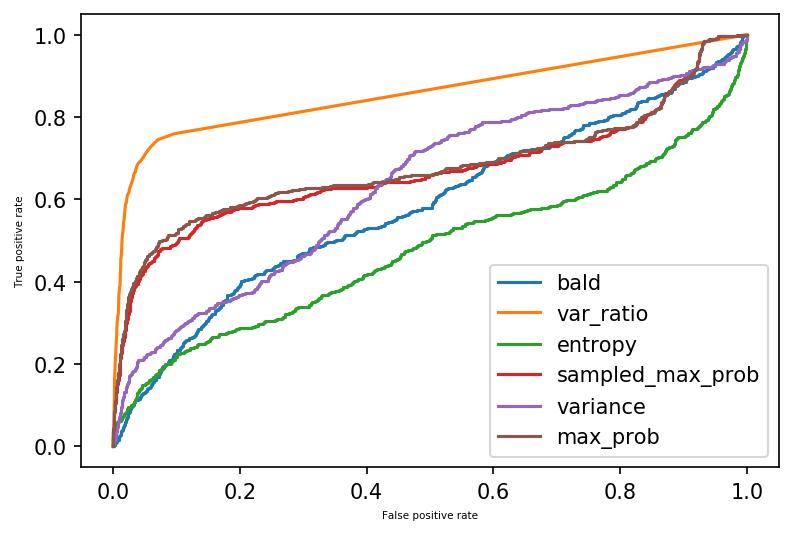

In [7]:
res_dir = '../workdir/results/dpp_masks_calibrate/conll2003/ht_dpp/rbf/True/20/0.3/101/101/'
probs, labels, sampled_probs = plot_roc_auc(res_dir)

### sequence level metrics

bald: 0.424745719808542
var_ratio: 0.5180498665316643
entropy: 0.36000782400589104
sampled_max_prob: 0.7666777890279823
variance: 0.38632179675994105
max_prob: 0.7322809278350515


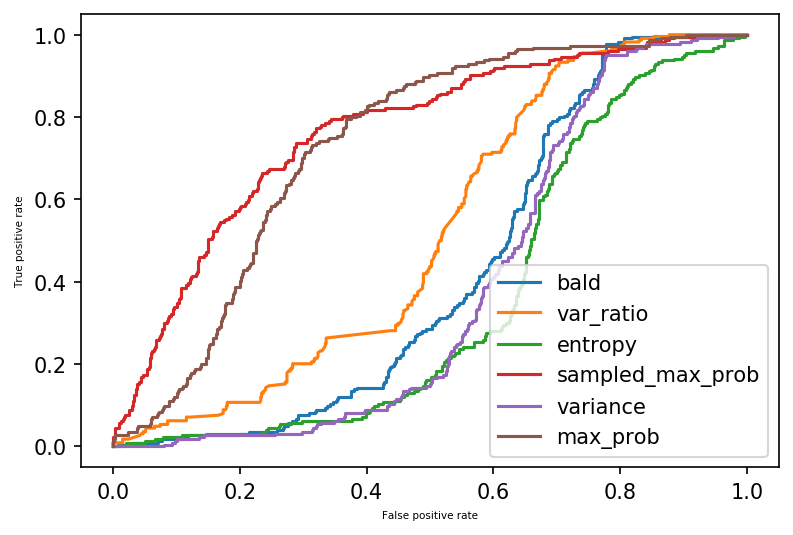

In [8]:
plot_roc_auc_seq(probs, labels, sampled_probs)

## MC All

### token level metrics

bald: 0.7984003800471708
var_ratio: 0.8620956156114488
entropy: 0.54262684089023
sampled_max_prob: 0.6536094045212326
variance: 0.629450186863385
max_prob: 0.6567544653631746


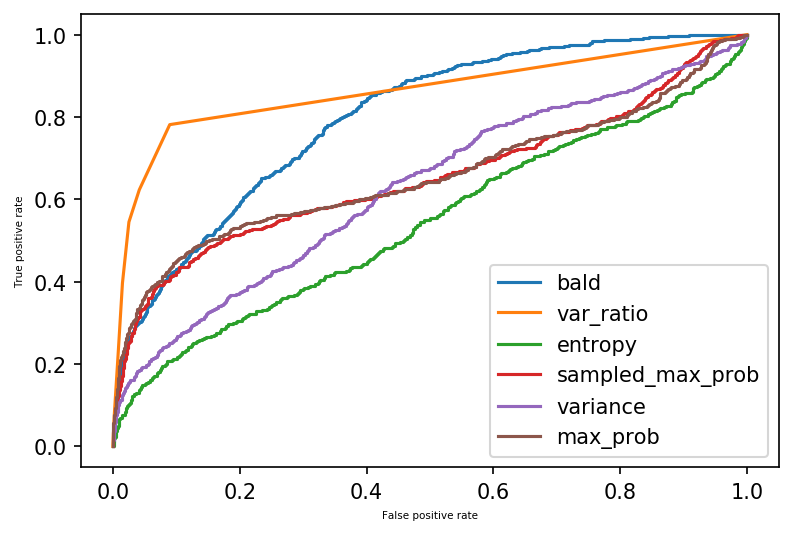

In [26]:
res_dir = '/notebook/uncertainty-estimation/workdir/results/conll2003/MC_all/0/2021-05-18/19-52-12-0'
probs, labels, sampled_probs = plot_roc_auc(res_dir)

### sequence level metrics

bald: 0.39376246935325165
var_ratio: 0.6402058156791754
entropy: 0.3190632287946247
sampled_max_prob: 0.7397785279775593
variance: 0.3574810683279787
max_prob: 0.7559730580426308


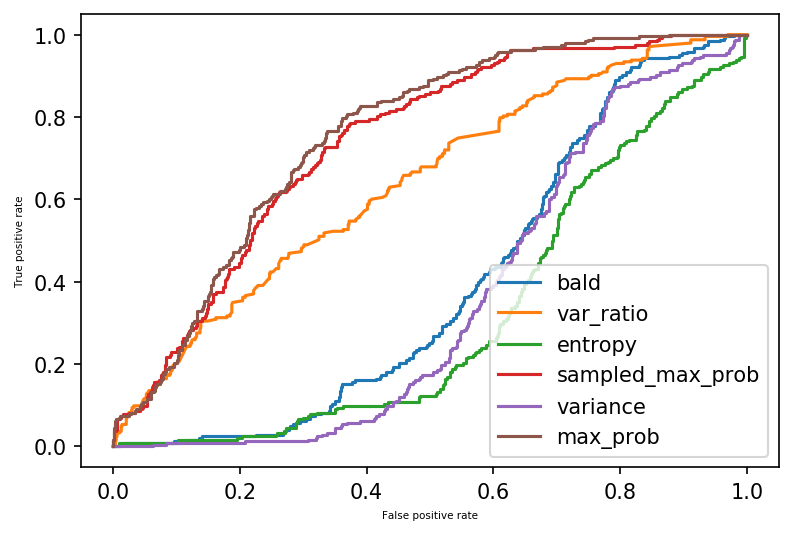

In [27]:
plot_roc_auc_seq(probs, labels, sampled_probs)

# DPP last

### token level metrics

bald: 0.9434075725999649
var_ratio: 0.9454730927292914
entropy: 0.9395453128956236
sampled_max_prob: 0.9407299924040278
variance: 0.9441252945873828
max_prob: 0.941127320179966


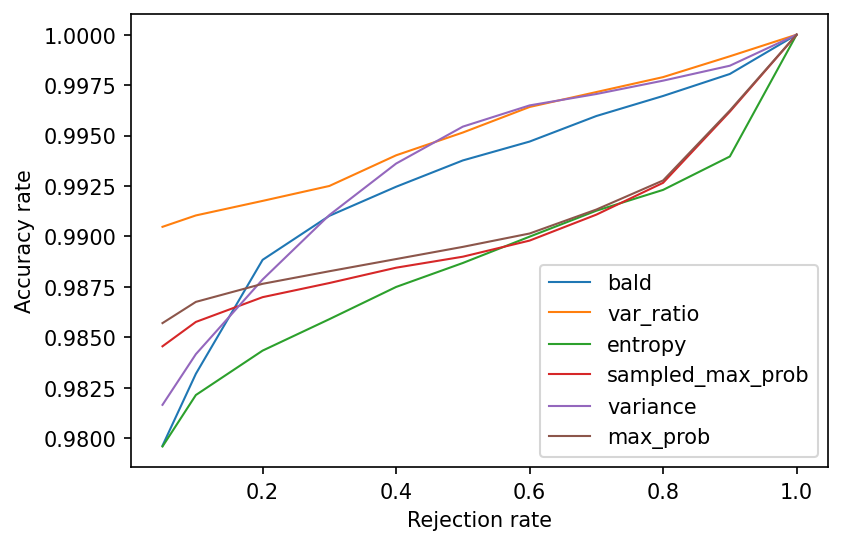

In [4]:
res_dir = '../workdir/results/dpp_ood/conll2003/DPP/last/20/0.3/101/17/'
plot_rejection_curves(res_dir)

bald: 0.6966856400217835
var_ratio: 0.7753120579386743
entropy: 0.5336613442206327
sampled_max_prob: 0.5540967012954957
variance: 0.732232195928221
max_prob: 0.570598957814482


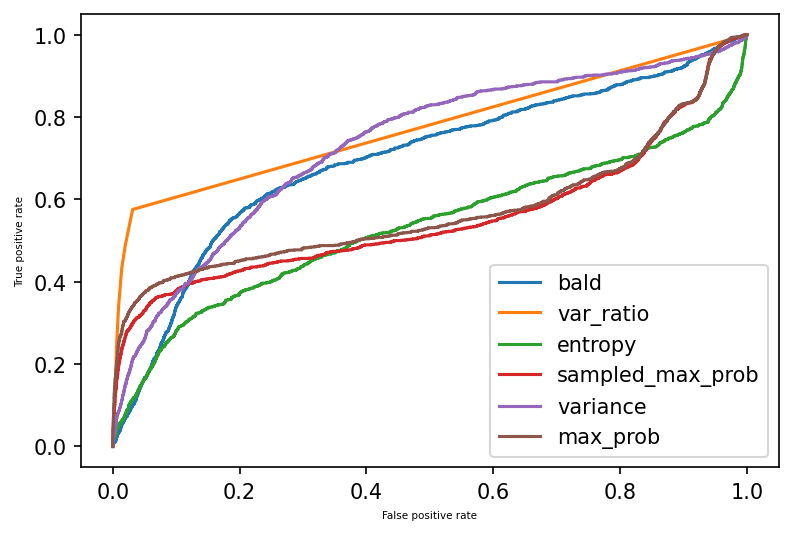

In [5]:
probs, labels, sampled_probs = plot_roc_auc(res_dir)

### sequence level metrics

bald: 0.5090180201343923
var_ratio: 0.5454813240540898
entropy: 0.4419264218629941
sampled_max_prob: 0.6575795171465346
variance: 0.44881733691582604
max_prob: 0.6451331688910423


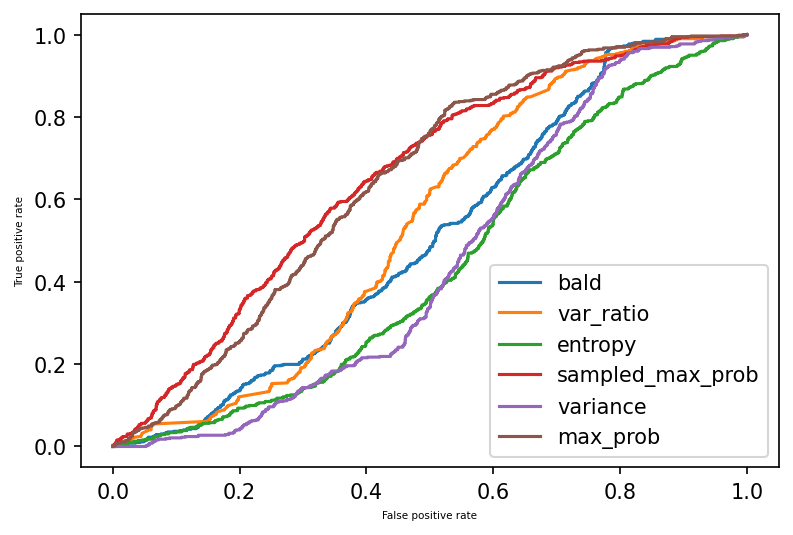

In [6]:
plot_roc_auc_seq(probs, labels, sampled_probs)

# NER for OOD 

In [2]:
from analyze_results import *

In [3]:
def unpad_preds(probs, sampled_probs, preds, labels):
    true_sampled_probs = [
        [p.tolist() for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(sampled_probs.transpose(1, 2, 3, 0), labels[:, :])
    ]
    true_probs = [
        [p.tolist() for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(probs, labels[:, :])
    ]
    true_predictions = [
        [p for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(preds, labels[:, :])
    ]
    true_labels = [
        [l for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(preds, labels[:, :])
    ]

    return true_sampled_probs, true_probs, true_predictions, true_labels

In [6]:
res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/conll2003/mc-dpp_last/0/2021-09-17/10-17-05-0'
#res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/conll2003/mc-dpp_last/0/2021-09-17/12-46-12-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())

In [7]:
ood_labels = np.asarray(model_outputs['ood_labels'])
sampled_probabilities = np.asarray(model_outputs['sampled_probabilities'])
probabilities = np.asarray(model_outputs['probabilities'])
answers = np.asarray(model_outputs['answers'])
labels = np.asarray(model_outputs['true_labels'])

sampled_probs, probs, predictions, labels = unpad_preds(
    probabilities, sampled_probabilities, np.argmax(probabilities, axis=-1), labels
)

bald: 0.6738682305241819
var_ratio: 0.5892888792354474
sampled_max_prob: 0.5042704894294816
variance: 0.7212079351288735
entropy: 0.7517535476397336
max_prob: 0.5061818708369533


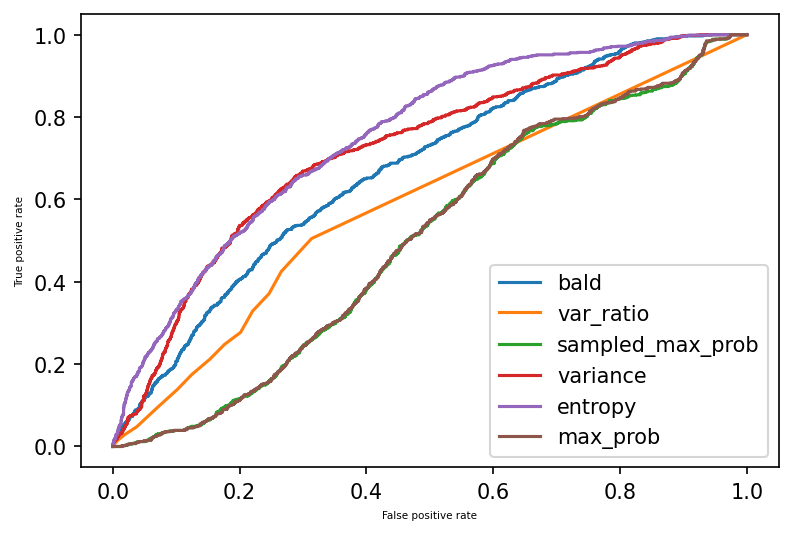

In [8]:
methods = {"bald": bald,
           "var_ratio": var_ratio,
           "sampled_max_prob": sampled_max_prob,
           "variance": probability_variance,
           "entropy": mean_entropy,}

plt.figure(dpi=150)

errors = ood_labels
results = {}
for name, method_function in methods.items():
    ue_scores = seq_ue(sampled_probs, method_function, avg_type='max')
    fpr, tpr, _ = roc_curve(errors, ue_scores)

    plt.plot(fpr, tpr, label=name)
    print(f"{name}:", roc_auc_score(errors, ue_scores))

    
n_examples = len(errors)
ue_scores_max = np.zeros(n_examples)
for i in range(n_examples):
    sent = probs[i]
    true_probs_max = np.asarray([1 - np.max(proba) for proba in sent])
    ue_scores_max[i] = np.max(true_probs_max)
    
fpr, tpr, _ = roc_curve(errors, ue_scores_max)
print(f"max_prob:", roc_auc_score(errors, ue_scores_max))
plt.plot(fpr, tpr, label="max_prob")
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

In [7]:
#res_path = '../workdir/run_conll2003_for_ensemble_series/2021-10-04/14-52-04/final_results/0/1'
res_path = '/notebook/uncertainty-estimation/workdir/results/conll2003/mc_last/0.1/2021-10-23/13-34-03-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())

In [8]:
probs = np.asarray(model_outputs['probabilities'])
probs_toks = probs.reshape(-1, probs.shape[-1])

sampled_probs = np.asarray(model_outputs['sampled_probabilities'])
sampled_probs_toks = sampled_probs.reshape(sampled_probs.shape[0], sampled_probs.shape[1]*sampled_probs.shape[2], -1)

labels = np.asarray(model_outputs['true_labels'])
labels_toks = labels.reshape(-1)

use_idx = (labels_toks!=-100)

probs_toks = probs_toks[use_idx]
labels_toks = labels_toks[use_idx]
sampled_probs_toks = sampled_probs_toks[:, use_idx].transpose(1, 0, 2)

bald: 0.349881242635414
var_ratio: 0.65596159387028
sampled_max_prob: 0.5012202013698875
variance: 0.4325551462187011
entropy: 0.6698427530486654
max_prob: 0.5009614696782732


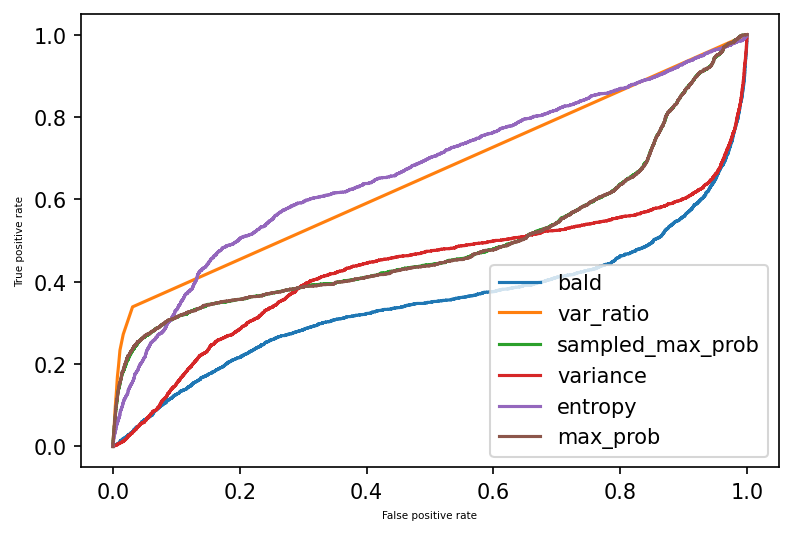

In [9]:
methods = {"bald": bald,
           "var_ratio": var_ratio,
           "sampled_max_prob": sampled_max_prob,
           "variance": probability_variance,
           "entropy": mean_entropy,
}

plt.figure(dpi=150)

preds = np.argmax(probs_toks, axis=-1)

errors = (labels_toks != preds).astype('uint8')
results = {}
for name, method_function in methods.items():
    ue_scores = method_function(sampled_probs_toks)
    fpr, tpr, _ = roc_curve(errors, ue_scores)

    plt.plot(fpr, tpr, label=name)
    print(f"{name}:", roc_auc_score(errors, ue_scores))

    
ue_scores_max = 1-np.max(probs_toks, axis=-1)
fpr, tpr, _ = roc_curve(errors, ue_scores_max)
print(f"max_prob:", roc_auc_score(errors, ue_scores_max))
plt.plot(fpr, tpr, label="max_prob")
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

bald: 0.9485082269189619
var_ratio: 0.5408088648247185
sampled_max_prob: 0.9539251147135229
variance: 0.9518029247077174
entropy: 0.952793591231127
max_prob: 0.9537160615052156


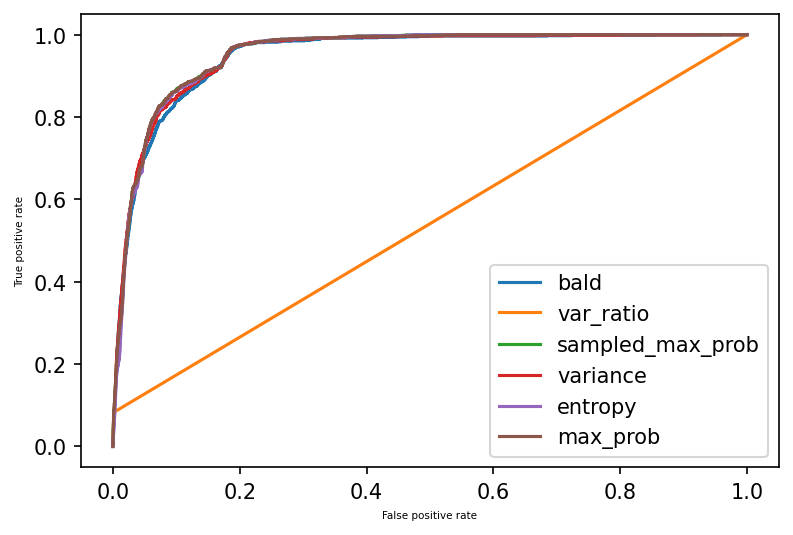

In [6]:
methods = {"bald": bald,
           "var_ratio": var_ratio,
           "sampled_max_prob": sampled_max_prob,
           "variance": probability_variance,
           "entropy": mean_entropy,
}

plt.figure(dpi=150)

preds = np.argmax(probs_toks, axis=-1)

errors = (labels_toks != preds).astype('uint8')
results = {}
for name, method_function in methods.items():
    ue_scores = method_function(sampled_probs_toks)
    fpr, tpr, _ = roc_curve(errors, ue_scores)

    plt.plot(fpr, tpr, label=name)
    print(f"{name}:", roc_auc_score(errors, ue_scores))

    
ue_scores_max = 1-np.max(probs_toks, axis=-1)
fpr, tpr, _ = roc_curve(errors, ue_scores_max)
print(f"max_prob:", roc_auc_score(errors, ue_scores_max))
plt.plot(fpr, tpr, label="max_prob")
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

bald: 0.6676919523181385
var_ratio: 0.7698418608326698
entropy: 0.7313993477481201
sampled_max_prob: 0.7408491735913972
variance: 0.5122798725890083
max_prob: 0.7026085896040899


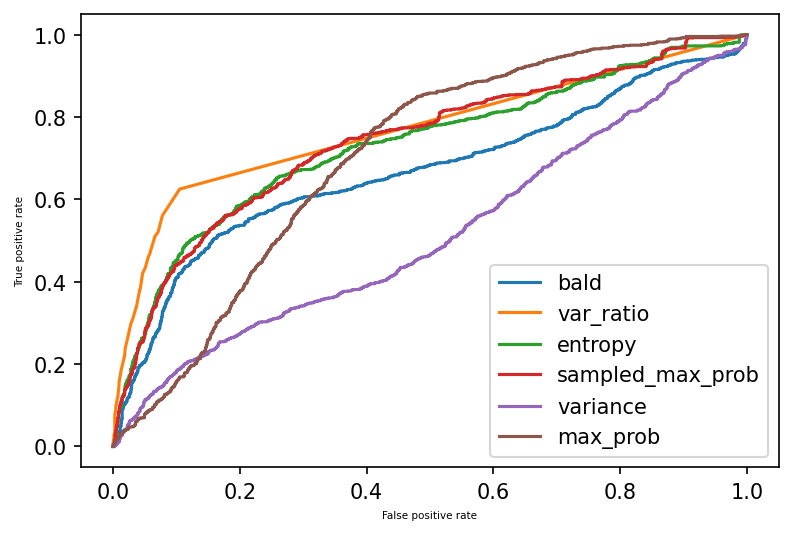

In [13]:
plot_roc_auc_seq(probs, labels, sampled_probs)

bald: 0.8274595088901981
var_ratio: 0.5753557557671716
entropy: 0.8334806409306037
sampled_max_prob: 0.8453903809722935
variance: 0.8531052863892005
max_prob: 0.8003913419035733


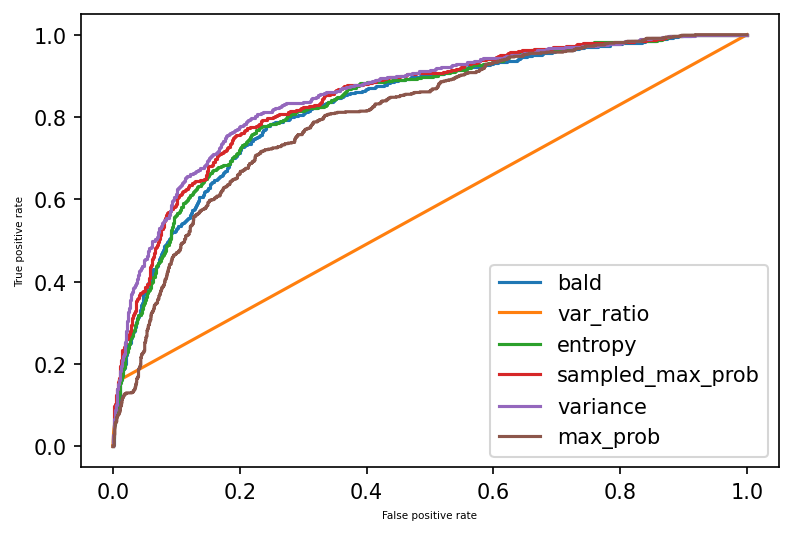

In [17]:
plot_roc_auc_seq(probs, labels, sampled_probs)

In [143]:
res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_ner_for_model_series/electra-raw-sngp/conll2003/0.0/results/102'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

In [144]:
model_outputs.keys()

dict_keys(['true_labels', 'eval_score', 'probabilities', 'answers', 'logits', 'stds', 'sampled_probabilities', 'sampled_answers'])

In [145]:
ue_scores = np.asarray(model_outputs['stds']).mean(-1)

In [146]:
probs = np.asarray(model_outputs['probabilities'])
sampled_probs = np.asarray(model_outputs['sampled_probabilities'])
labels = np.asarray(model_outputs['true_labels'])

In [147]:
from analyze_results import *

In [148]:
probs_toks = probs.reshape(-1, probs.shape[-1])
sampled_probs_toks = sampled_probs.reshape(sampled_probs.shape[0], sampled_probs.shape[1]*sampled_probs.shape[2], -1)
labels_toks = labels.reshape(-1)
ue_scores_toks = ue_scores.reshape(-1)

use_idx = (labels_toks!=-100)

probs_toks = probs_toks[use_idx]
labels_toks = labels_toks[use_idx]
ue_scores_toks = ue_scores_toks[use_idx]
   
predictions = np.argmax(probs_toks, axis=-1)

print(f'accuracy score: {np.sum(predictions == labels_toks) / len(labels_toks)}')

accuracy score: 0.936403008889902


In [149]:
errors = (labels_toks!=predictions).astype('uint8')

In [150]:
conf = np.max(probs_toks, axis=1)
results = {}

results['SNGP'] = rcc_auc(-ue_scores_toks, errors)
results["max_prob"] = rcc_auc(conf, errors)
print(results)

{'SNGP': 82.90725725150848, 'max_prob': 275.0498821142332}


In [151]:
conf = np.max(probs_toks, axis=1)
results = {}

results['SNGP'] = rpp(-ue_scores_toks, errors)*100
results["max_prob"] = rpp(conf, errors)*100
print(results)

{'SNGP': 0.8968100988845913, 'max_prob': 3.30074106158086}


In [152]:
ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sorted_indexes_ensemble = np.argsort(-ue_scores_toks)
ens_scores = [
    get_score_ratio(sorted_indexes_ensemble, predictions, labels_toks, ratio)
    for ratio in ratio_list
]
results["SNGP"] = auc(ratio_list, ens_scores)

model_ues = 1 - np.max(probs_toks, axis=1)
sorted_indexes_model = np.argsort(-model_ues)
model_scores = [
    get_score_ratio(sorted_indexes_model, predictions, labels_toks, ratio)
    for ratio in ratio_list
]
results["max_prob"] = auc(ratio_list, model_scores)
print(results)

{'SNGP': 0.9413779348073853, 'max_prob': 0.918258490996125}


In [153]:
_, _, predictions, _ = unpad_preds(
    probs, sampled_probs, np.argmax(probs, axis=-1), labels
)

sampled_probs, probs, ue_scores, labels = unpad_preds(
    probs, sampled_probs, ue_scores, labels
)

In [154]:
risk_binary = [1.0 * (l != p) for l, p in zip(labels, predictions)]

results = {}
ue_scores_stds = np.zeros(len(labels))
for i in range(len(labels)):
    sent = np.asarray(ue_scores[i])
    ue_scores_stds[i] = sent.max()
results['SNGP'] = rcc_auc(-ue_scores_stds, risk_binary)

n_examples = len(risk_binary)
ue_scores_max = np.zeros(n_examples)
for i in range(n_examples):
    sent = probs[i]
    true_probs_max = np.asarray([np.max(proba) for proba in sent])
    ue_scores_max[i] = np.mean(true_probs_max)
results["max_prob"] = rcc_auc(ue_scores_max, risk_binary)

print(results)

{'SNGP': 104.72792509760494, 'max_prob': 168.8098551818681}


In [155]:
risk_binary = [1.0 * (l != p) for l, p in zip(labels, predictions)]

results = {}
ue_scores_stds = np.zeros(len(labels))
for i in range(len(labels)):
    sent = np.asarray(ue_scores[i])
    ue_scores_stds[i] = sent.max()
results['SNGP'] = rpp(-ue_scores_stds, risk_binary)*100

n_examples = len(risk_binary)
ue_scores_max = np.zeros(n_examples)
for i in range(n_examples):
    sent = probs[i]
    true_probs_max = np.asarray([np.max(proba) for proba in sent])
    ue_scores_max[i] = np.mean(true_probs_max)
results["max_prob"] = rpp(ue_scores_max, risk_binary)*100

print(results)

{'SNGP': 5.918924595673178, 'max_prob': 13.814744801512289}


In [156]:
def get_score_ratio_seq(sorted_indexes, answers, true_answers, ratio):
    last_index = int(len(sorted_indexes) * ratio)
    sel_indexes = sorted_indexes[:last_index]
    unsel_indexes = sorted_indexes[last_index:]

    sel_answers = []
    for ind in sel_indexes:
        sel_answers.append(true_answers[ind])
    for ind in unsel_indexes:
        sel_answers.append(answers[ind])

    sel_true_answers = []
    for ind in sel_indexes:
        sel_true_answers.append(true_answers[ind])
    for ind in unsel_indexes:
        sel_true_answers.append(true_answers[ind])

    score = sum([1.0 * (l == p) for l, p in zip(sel_answers, sel_true_answers)]) / len(
        sel_answers
    )
    return score

In [157]:
risk_binary = [1.0 * (l != p) for l, p in zip(labels, predictions)]

results = {}
ue_scores_stds = np.zeros(len(labels))
for i in range(len(labels)):
    sent = np.asarray(ue_scores[i])
    ue_scores_stds[i] = sent.max()
    
ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sorted_indexes_ensemble = np.argsort(-ue_scores_stds)
ens_scores = [
    get_score_ratio_seq(sorted_indexes_ensemble, predictions, labels, ratio)
    for ratio in ratio_list
]
results["SNGP"] = auc(ratio_list, ens_scores)


n_examples = len(risk_binary)
ue_scores_max = np.zeros(n_examples)
for i in range(n_examples):
    sent = probs[i]
    true_probs_max = np.asarray([np.max(proba) for proba in sent])
    ue_scores_max[i] = np.mean(true_probs_max)
sorted_indexes_ensemble = np.argsort(-ue_scores_max)
ens_scores = [
    get_score_ratio_seq(sorted_indexes_ensemble, predictions, labels, ratio)
    for ratio in ratio_list
]
results["max_prob"] = auc(ratio_list, ens_scores)

print(results)

{'SNGP': 0.7879710144927535, 'max_prob': 0.7384057971014493}


In [29]:
res_path = '/home/jovyan/uncertainty-estimation/workdir/results/conll2003/maha_/0.01/2022-03-11/23-17-18-0'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

In [30]:
ue_scores = np.asarray(model_outputs['mahalanobis_distance'])#.mean(-1)
probs = np.asarray(model_outputs['probabilities'])
labels = np.asarray(model_outputs['true_labels'])

In [31]:
labels_toks = labels.reshape(-1)
use_idx = labels_toks != -100

probs_toks = probs.reshape(-1, probs.shape[-1])

In [32]:
from analyze_results import rcc_auc

In [33]:
predictions = np.argmax(probs_toks[use_idx], axis=-1)
risk_binary = (predictions != labels_toks[use_idx]).astype(int)

conf = np.max(probs_toks[use_idx], axis=1)
results = {}

results["maha"] = rcc_auc(-ue_scores.reshape(-1)[use_idx], risk_binary)
results["max_prob"] = rcc_auc(conf, risk_binary)

In [34]:
results

{'maha': 3801.4393787406007, 'max_prob': 1415.559761731689}

In [36]:
res_path = '/home/jovyan/uncertainty-estimation/workdir/results/conll2003/maha_/0.01/2022-03-11/23-39-26-0'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

In [37]:
ue_scores = np.asarray(model_outputs['mahalanobis_distance'])#.mean(-1)
probs = np.asarray(model_outputs['probabilities'])
labels = np.asarray(model_outputs['true_labels'])

In [38]:
labels_toks = labels.reshape(-1)
use_idx = labels_toks != -100

probs_toks = probs.reshape(-1, probs.shape[-1])

In [39]:
predictions = np.argmax(probs_toks[use_idx], axis=-1)
risk_binary = (predictions != labels_toks[use_idx]).astype(int)

conf = np.max(probs_toks[use_idx], axis=1)
results = {}

results["maha"] = rcc_auc(-ue_scores.reshape(-1)[use_idx], risk_binary)
results["max_prob"] = rcc_auc(conf, risk_binary)

In [40]:
results

{'maha': 3801.4393787406007, 'max_prob': 1415.559761731689}